# **Project Introduction**

In this project you will be provided with real world data which is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. 

The classification goal is to predict if the client will subscribe a term deposit (variable y).

![img](https://www.esa.int/var/esa/storage/images/esa_multimedia/images/2014/06/portuguese_bank/14568311-1-eng-GB/Portuguese_bank_pillars.jpg)

We are a data science team in thier offices and it our task to make the most sense of the data provided by the company

![img](https://www.expatica.com/app/uploads/sites/8/2017/05/banking-in-portugal-1920x1080.jpg)

# Let us Get Started!

As you remember our task is to explore our Bank's Marketing campaign and create meaningful insights from the data

The step one should be accessing the data 

Our data has been curated by [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) which is an excellent datahouse of various real world problems! 

We are going to use the Banking Data described by our friends in UCI [here](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

The data can also be downloaded from the Tech I.S. [Github](https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv) Repository 



# Good Start!

Now that you have your dataset , let us go through the problems one by one!

# Section I : Data Loading

Part I : Load the dataset into the notebook <br>
Part II : Explore and make note of Attribute Information from UCI <br>
Part III : What is the significance of the `y` column in the dataset and what are the value counts of the `y` column? <br>
Part IV : What is the ratio of the two classes ? Are they balanced ? <br>

# Section II : Data Cleaning 

Since this is real world data , A good practice is to make sure the dataset is devoid of any nuances 

Part I : Get the `dtypes` of all the columns of our dataset <br>
Part II : Refering to the UCI data description , explore the data in your columns and check if there are any errors <br>
Part III : Make note of the deviation in the dataset compared to the description provided by [UCI](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) <br>
Part IV : Using Data Cleaning principles you learned from [Pandas Tutorial](https://github.com/Tech-i-s/data-science-course-wiki/tree/master/common/step%201-4%20(Pandas)) figure out the best ways to get rid of the dirty data 
Part V : Print the cleaned data



# Section III : Exploring data with Group by

In this section , we must create some primitive EDA

Use the `groupby` function on the mean of the following columns :

I : y <br>
II : job <br>
III : marital<br>
IV : education<br>

Make a note of what you learn from the outputs !




# Section III : Exploratory Data Analysis

Let us put Matplotlib to use !

Part I : Create bar graphs to the frequency of purchase with respect to the job , martial etc <br>
Part II : Also create stacked bars to same data columns with respect to <br>
Part III : Explore the age column using a histogram and note down your observations

# Section IV : Categorical Variable Encoding 

Part I : Create dummy variables for your categorial variables <br>
part II : Explore your new dataset with these new dummy variables !

# Section V : Preliminary Training 

Part I : Import your [Logisitc Regression libraries](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) <br>
Part II : Split your train and test dataset and train on the data <br>
Part III : Make note of the classification report and other metrics 

# Section VI : Let's Improve the performance !

Part 0 : What was your answer to **Section - Part IV**? Do you think class imbalance affects the model performance? Explore [SMOTE implementation](https://arxiv.org/pdf/1106.1813.pdf)

Part I : Make note of the performance from the last training <br>
Part II : Try implementing [SMOTE](http://imbalanced-learn.org/en/stable/over_sampling.html#smote-variants) to balance the two class labels <br>
Part III :  Make note of the `y` label data now , what are the rations now ?

# Section VII : Let us Re-Train!

Part I : Explore what [RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html) means <br>
Part II : Implement your training process inside the RFE <br>
Part III : What are the best columns that your RFE found? Please make a list of it 

# Section VIII : Training time !

Now that you have found the best columns for this problem

Part I : Now train the model with the new data you have created after the RFE <br>
Part II : Create the prediction system to get the metrics such as accuracy

# Section IX : Additional Metrics

Accuracy is not always the best metric 

Part I : Explore what [Confusion Matrix](https://www.geeksforgeeks.org/confusion-matrix-machine-learning/#:~:text=A%20confusion%20matrix%20is%20a,the%20performance%20of%20an%20algorithm.) means <br>
Part II : Create the confusion matrix for the predictions and make note of the outputs <br>
Part III : Create a classification report and make note of various outputs 

# Section X : What's next?

Part I : Make a note of difference in performance? <br>
Part II : Can you recommend more improvements that could give much better results in all metrics?

# Section 1 part 1

In [10]:
pip install --upgrade ipykernel

Requirement already up-to-date: ipykernel in /opt/anaconda3/lib/python3.8/site-packages (6.4.1)
Note: you may need to restart the kernel to use updated packages.


In [11]:
import warnings
warnings.filterwarnings('ignore')



import sys
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from collections import Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [12]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [13]:
%config Completer.use_jedi = False

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

np.set_printoptions(threshold=sys.maxsize)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

# Section 1 part 2

Input variables:

bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical:'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)


# Section 1 part 3

The y column is an output variable with two choices. It can either say yes or no. Its a binary output.Often, more than one contact to the same client was required, in order to access if the product would be subscribed. 'Yes' meaning they would be subscribed and 'no' they wouldn't be willing.

# Section 2 

In [16]:
df= pd.read_csv("portu_banking_final.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [17]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,222,1,999.0,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,196,2,999.0,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,62,3,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,200,2,999.0,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0
41187,25,student,single,high.school,no,no,no,telephone,may,fri,112,4,999.0,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


In [18]:
df.shape

(41188, 21)

In [19]:
df.describe().astype(np.int64)

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
mean,258,2,963,0,0,93,-40,3,5167,0
std,259,2,211,0,1,0,4,1,72,0
min,0,1,0,0,-3,92,-50,0,4963,0
25%,102,1,999,0,-1,93,-42,1,5099,0
50%,180,2,999,0,1,93,-41,4,5191,0
75%,319,3,999,0,1,93,-36,4,5228,0
max,4918,56,9999,7,1,94,-26,5,5228,1


In [20]:
df.describe()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,258.285010,2.567593,963.568005,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,259.279249,2.770014,211.772296,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,4918.000000,56.000000,9999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [21]:
print(list(df.columns))

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


# Section 3

In [22]:
df.groupby('y').mean()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,
0,220.844807,2.633085,985.345135,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [23]:
df.groupby('duration').mean()

,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
duration,,,,,,,,,
0,4.750000,999.000000,0.000000,-0.275000,93.351500,-41.450000,3.150000,5154.325000,0.0
1,1.000000,669.000000,1.333333,-1.333333,93.824333,-40.700000,1.072667,5008.766667,0.0
2,1.000000,999.000000,0.000000,-0.100000,93.200000,-42.000000,4.153000,5195.800000,0.0
3,1.666667,999.000000,0.000000,1.100000,93.994000,-36.400000,4.856667,5191.000000,0.0
4,3.166667,917.083333,0.083333,-0.466667,94.067333,-40.916667,2.603917,5080.133333,0.0
...,...,...,...,...,...,...,...,...,...
3631,2.000000,999.000000,0.000000,1.100000,93.994000,-36.400000,4.864000,5191.000000,1.0
3643,1.000000,999.000000,0.000000,1.400000,93.918000,-42.700000,4.963000,5228.100000,1.0
3785,1.000000,999.000000,0.000000,-1.700000,94.027000,-38.300000,0.888000,4991.600000,0.0


In [24]:
df.groupby('marital').mean()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,
D,87.500000,1.250000,999.000000,0.000000,1.250000,93.974250,-37.675000,4.909750,5209.550000,0.000000
M,418.400000,2.600000,999.000000,0.200000,-0.960000,92.931400,-37.560000,2.589200,5141.540000,0.000000
S,283.333333,2.000000,999.000000,0.000000,-0.233333,93.396333,-34.733333,3.531333,5152.733333,0.000000
divorced,253.934679,2.614583,968.613498,0.168837,0.163043,93.606244,-40.709701,3.714567,5170.845074,0.103299
married,257.406332,2.572804,967.963528,0.155599,0.183854,93.597501,-40.271203,3.746064,5171.854853,0.101593
single,261.518720,2.533939,952.231474,0.211414,-0.167972,93.517331,-40.920303,3.317391,5155.199905,0.140078
unknown,312.725000,3.187500,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [25]:
df.groupby('education').mean()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,
basic-4y,259.750000,4.250000,915.916667,0.250000,0.166667,93.747500,-42.225000,3.615083,5167.266667,0.083333
basic-6y,222.500000,2.500000,999.000000,0.000000,0.766667,93.784667,-39.933333,4.313333,5194.233333,0.000000
basic-9y,144.900000,1.600000,999.000000,0.200000,0.270000,93.732300,-42.120000,3.716900,5161.490000,0.000000
basic.4y,264.842459,2.595821,970.171230,0.146734,0.216066,93.658052,-40.234150,3.752162,5170.133117,0.102546
basic.6y,264.524497,2.556430,980.319335,0.129484,0.229746,93.649709,-41.131015,3.771524,5174.666842,0.082240
basic.9y,261.484673,2.533886,979.100249,0.141342,0.159056,93.623218,-41.325435,3.697932,5172.311914,0.078376
high.school,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,252.533855,2.586115,962.482548,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485


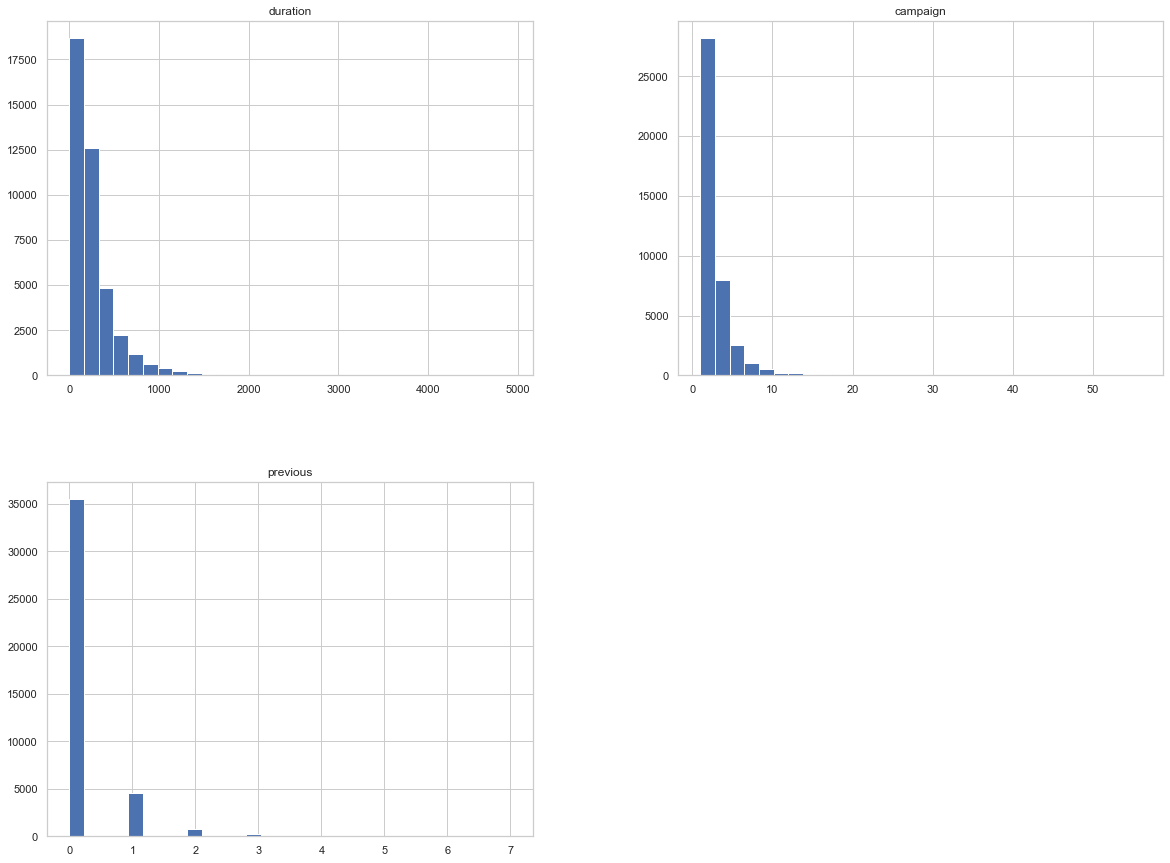

In [26]:
%matplotlib inline
df[['age','duration','campaign','previous']].hist(bins=30, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [27]:
df['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'basic-6y',
       'basic-9y', 'basic-4y', 'illiterate'], dtype=object)

Duration is a good indicator, but we can quite see when it was done

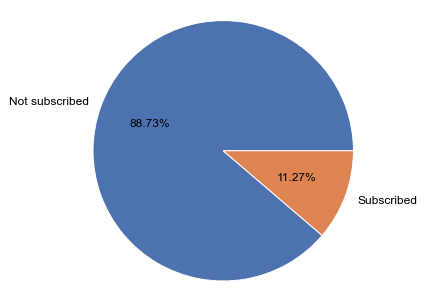

In [28]:
labels = ["Not subscribed", "Subscribed"]
  
 
fig = plt.figure() 
ax = fig.add_axes([0,0,1,1]) 

ax.pie(df['y'].value_counts(), 
       labels = labels,
       autopct ='%1.2f%%',
       textprops = dict(color ="black", size=12))

ax.axis('equal')

plt.show()


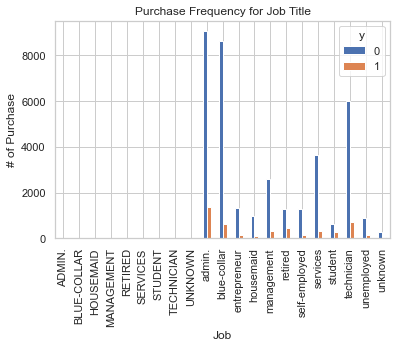

In [29]:
%matplotlib inline

pd.crosstab(df.job,df.y).plot(kind='bar')


plt.title('Purchase Frequency for Job Title')


plt.xlabel('Job')


plt.ylabel('# of Purchase')


plt.savefig('purchase_fre_job')


frequency of purchase of the deposit depends a great deal on the job title.

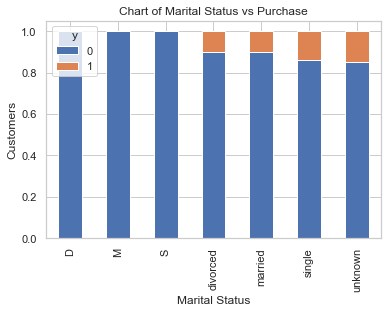

In [30]:
table=pd.crosstab(df.marital,df.y)

table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

plt.title( 'Chart of Marital Status vs Purchase')

plt.xlabel('Marital Status')

plt.ylabel('Customers')

plt.savefig('mariral_vs_pur_stack')


This chart on the other hand shows that marital status is not a strong indicator of purchase

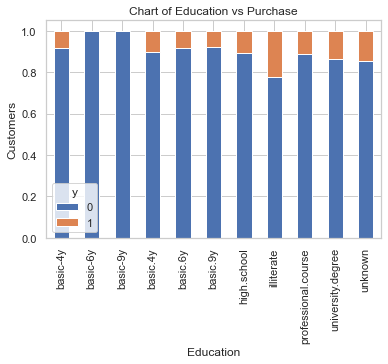

In [31]:
table=pd.crosstab(df.education,df.y)

table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

plt.title('Chart of Education vs Purchase')

plt.xlabel('Education')

plt.ylabel('Customers')

plt.savefig('edu_vs_pur_stack')

Education is a good predictor of purchase

In [32]:
df.groupby(['campaign'])['y'].count().reset_index().sort_values(by='y', ascending=False).iloc[:5]

,campaign,y
0,1,17642
1,2,10570
2,3,5341
3,4,2651
4,5,1599


Text(0, 0.5, 'Frequency of Purchase')

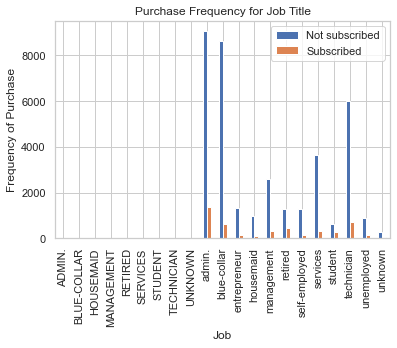

In [33]:
table = pd.crosstab(df.job, df.y)
table.columns = ['Not subscribed', 'Subscribed']
table.plot(kind='bar')

plt.grid(True)

plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

In [34]:
table = pd.crosstab(df.job, df.y)
table = round(table.div(table.sum(axis=1), axis=0).mul(100), 2)
table.columns=['notsubcribed', 'subcribed']
table.sort_values(by=['subcribed'], ascending=False).loc[:, 'subcribed']

job
STUDENT          100.00
RETIRED           33.33
student           31.27
retired           25.22
unemployed        14.20
admin.            12.98
unknown           11.25
management        11.22
technician        10.83
self-employed     10.49
housemaid         10.01
entrepreneur       8.52
services           8.14
blue-collar        6.90
BLUE-COLLAR        0.00
UNKNOWN            0.00
TECHNICIAN         0.00
SERVICES           0.00
MANAGEMENT         0.00
HOUSEMAID          0.00
ADMIN.             0.00
Name: subcribed, dtype: float64

Duration affects the output target

In [35]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [37]:
df.job.unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student', 'MANAGEMENT', 'RETIRED',
       'STUDENT', 'ADMIN.', 'TECHNICIAN', 'BLUE-COLLAR', 'HOUSEMAID',
       'SERVICES', 'UNKNOWN'], dtype=object)

In [38]:
df.shape

(41188, 21)

In [39]:
df.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [41]:
columns= df.columns.values
print("Features: ",columns)

Features:  ['age' 'job' 'marital' 'education' 'default' 'housing' 'loan' 'contact'
 'month' 'day_of_week' 'duration' 'campaign' 'pdays' 'previous' 'poutcome'
 'emp_var_rate' 'cons_price_idx' 'cons_conf_idx' 'euribor3m' 'nr_employed'
 'y']


In [42]:
df1=df

In [43]:
df1.dtypes

age                object
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [44]:
df1.age = df.age.astype(str).str[:2]
df1.age = df.age.astype('int64')
df1.age.unique()

array([44, 53, 28, 39, 55, 30, 37, 36, 27, 34, 41, 33, 26, 52, 35, 40, 32,
       49, 38, 47, 46, 29, 54, 42, 72, 48, 43, 56, 31, 24, 68, 59, 50, 45,
       25, 57, 63, 58, 60, 64, 51, 23, 20, 74, 80, 61, 62, 75, 21, 82, 77,
       18, 70, 76, 73, 66, 22, 71, 19, 79, 88, 65, 67, 81, 84, 69, 98, 85,
       83, 78, 92, 86, 94, 17, 91, 89, 87, 95])

In [45]:
import re
s=""
i=-1
for ag in df1.age:
  i+=1
  a=re.search("\d\d-\d\d", str(ag))
  if a!=None:
    print(a)
    print(i)

In [46]:
df1.age=pd.to_numeric(df1.age)

In [47]:
df1.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [48]:
def categorize(df):
    new_df = df1.copy()
    le = preprocessing.LabelEncoder()
    
    new_df['job'] = le.fit_transform(new_df['job'])
    new_df['marital'] = le.fit_transform(new_df['marital'])
    new_df['education'] = le.fit_transform(new_df['education'])
    new_df['default'] = le.fit_transform(new_df['default'])
    new_df['housing'] = le.fit_transform(new_df['housing'])
    new_df['month'] = le.fit_transform(new_df['month'])
    new_df['loan'] = le.fit_transform(new_df['loan'])
    new_df['contact'] = le.fit_transform(new_df['contact'])
    new_df['day_of_week'] = le.fit_transform(new_df['day_of_week'])
    new_df['poutcome'] = le.fit_transform(new_df['poutcome'])
    new_df['y'] = le.fit_transform(new_df['y'])
    return new_df

In [49]:
df1.replace(['basic.6y','basic.4y', 'basic.9y'], 'basic', inplace=True)

In [50]:
df1.fillna(method='ffill')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic,unknown,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,222,1,999.0,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic,unknown,no,no,telephone,may,thu,196,2,999.0,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,62,3,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,200,2,999.0,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [51]:
df1.replace(['basic-4y','basic-9y','basic-6y'],'basic',inplace=True)

In [52]:
df1.education.value_counts()

basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [53]:
df1.replace(['SERVICES','RETIRED','ADMIN.','STUDENT','BLUE-COLLAR','MANAGEMENT','TECHNICIAN','UNKNOWN','HOUSEMAID'],['services','retired','admin','student','blue-collar','management','technician','unknown','housemaid'],inplace=True)

In [54]:
df1.job.value_counts()

admin.           10420
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
admin                2
Name: job, dtype: int64

In [55]:
df1.job.replace('admin.','admin',inplace=True)

In [56]:
df1.job.value_counts()

admin            10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [57]:
df1.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.909680,220.844807,2.633085,985.345135,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [58]:
df1.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
D,39.000000,87.500000,1.250000,999.000000,0.000000,1.250000,93.974250,-37.675000,4.909750,5209.550000,0.000000
M,41.400000,418.400000,2.600000,999.000000,0.200000,-0.960000,92.931400,-37.560000,2.589200,5141.540000,0.000000
S,28.666667,283.333333,2.000000,999.000000,0.000000,-0.233333,93.396333,-34.733333,3.531333,5152.733333,0.000000
divorced,44.903646,253.934679,2.614583,968.613498,0.168837,0.163043,93.606244,-40.709701,3.714567,5170.845074,0.103299
married,42.306063,257.406332,2.572804,967.963528,0.155599,0.183854,93.597501,-40.271203,3.746064,5171.854853,0.101593
single,33.158236,261.518720,2.533939,952.231474,0.211414,-0.167972,93.517331,-40.920303,3.317391,5155.199905,0.140078
unknown,40.275000,312.725000,3.187500,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [59]:
df1.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
basic,42.163110,263.043874,2.559498,976.316471,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.996427,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.079344,252.533855,2.586115,962.482548,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.877219,253.223373,2.563527,953.286982,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


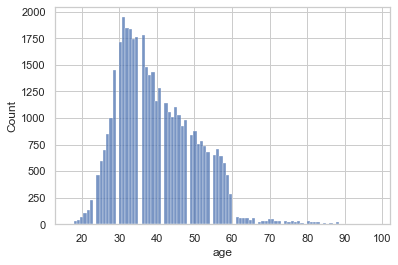

In [60]:
sns.histplot(df1['age'])
#plt.lab
plt.show()

In [61]:
data=df

<function matplotlib.pyplot.show(close=None, block=None)>

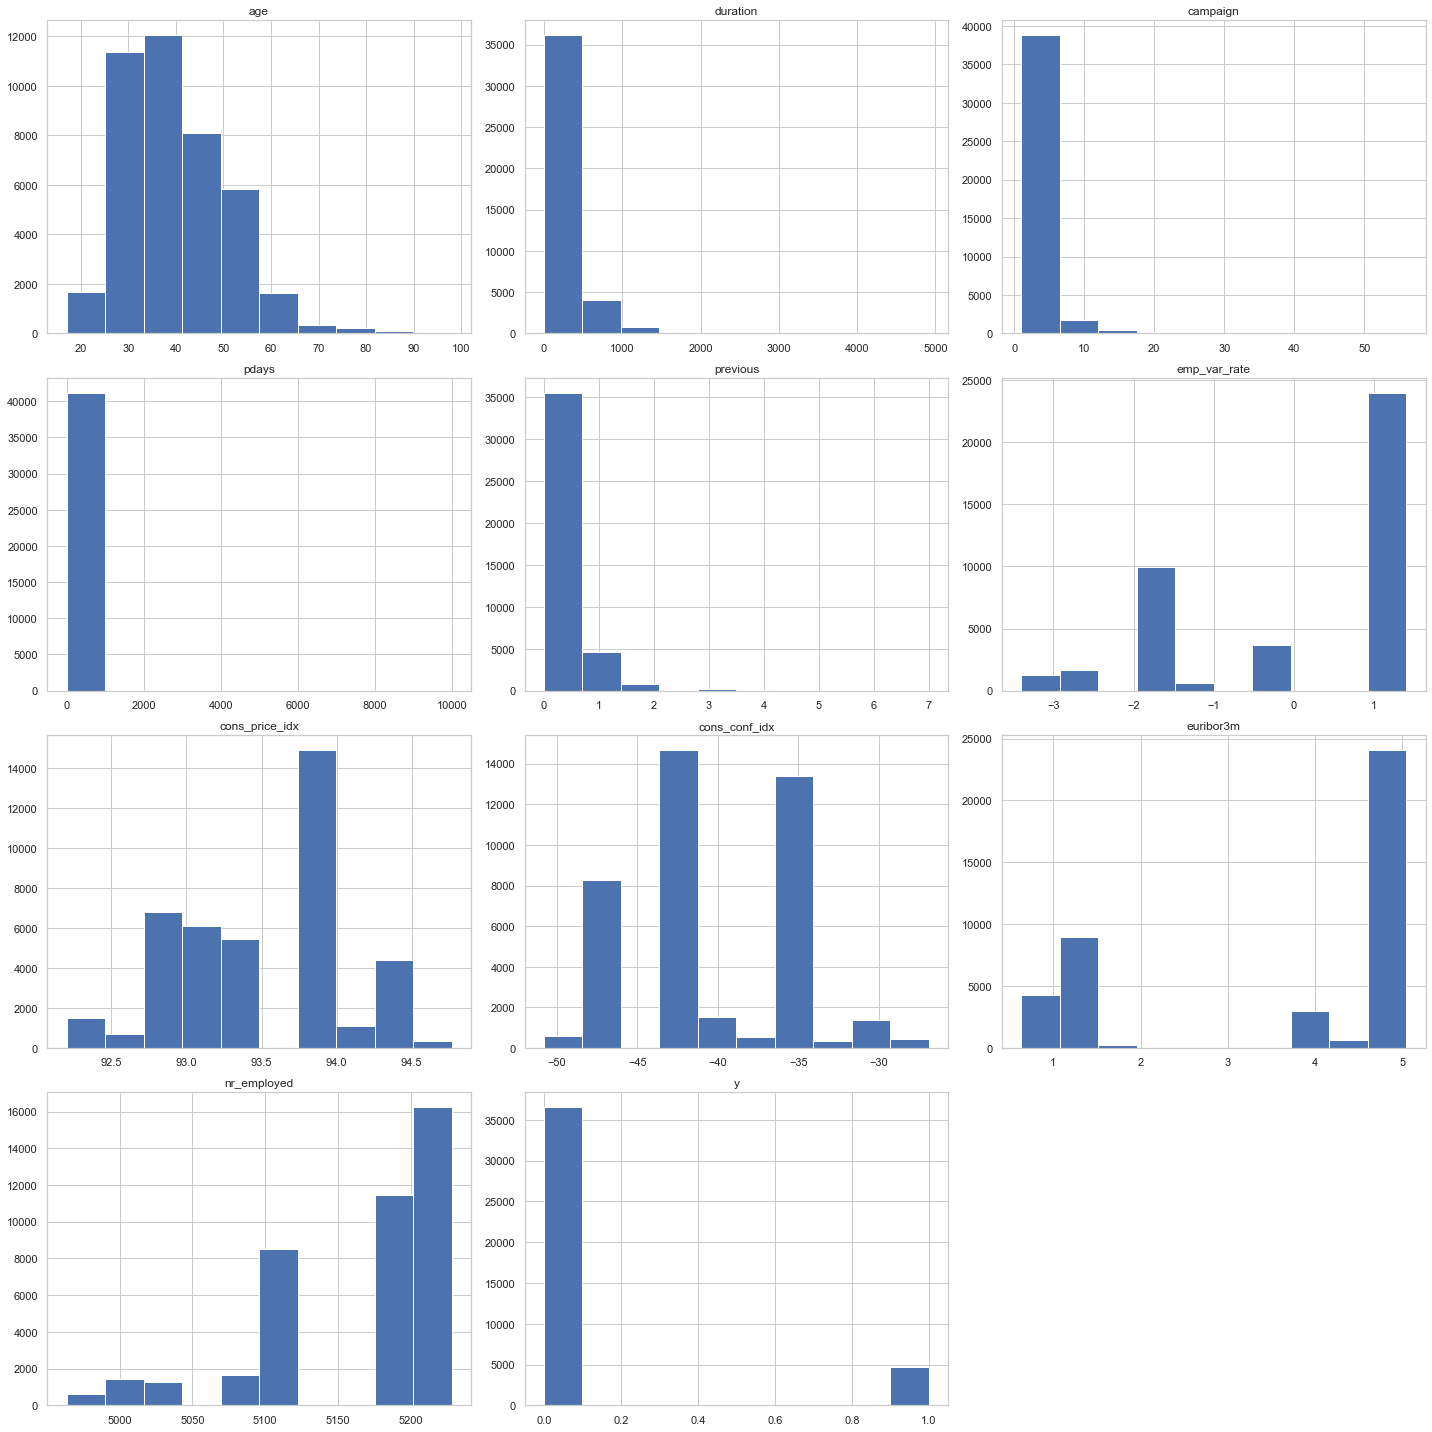

In [62]:
df.hist(figsize=(20,20))
plt.tight_layout()
plt.show

In [63]:
x=df.iloc[:]
print(x)
#df.plot.bar(y=df.y)

       age          job  marital            education  default housing loan  \
0       44  blue-collar  married                basic  unknown     yes   no   
1       53   technician  married              unknown       no      no   no   
2       28   management   single    university.degree       no     yes   no   
3       39     services  married          high.school       no      no   no   
4       55      retired  married                basic       no     yes   no   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   59      retired  married          high.school  unknown      no  yes   
41184   31    housemaid  married                basic  unknown      no   no   
41185   42        admin   single    university.degree  unknown     yes  yes   
41186   48   technician  married  professional.course       no      no  yes   
41187   25      student   single          high.school       no      no   no   

         contact month day_of_week  duration  campa

In [64]:
df1.shape

(41188, 21)

In [65]:
df1.default=df1.default.replace(to_replace='unknown',value=np.nan)

In [66]:
df1.shape

(41188, 21)

In [67]:
df1.default.value_counts(dropna=False)

no     32588
NaN     8597
yes        3
Name: default, dtype: int64

In [68]:
df1.default.value_counts(normalize=True)

no     0.999908
yes    0.000092
Name: default, dtype: float64

In [69]:
df1.default=df1.default.fillna(pd.Series(np.random.choice(['no','yes'],p=[0.999907,0.000093],size=len(df))))

In [70]:
cols=df1.columns.values
for i in cols:
  print(i)
  print(df1[i].value_counts())
  print()



age
31    1947
32    1844
33    1832
36    1780
35    1761
34    1744
30    1717
37    1475
29    1452
39    1432
38    1407
41    1278
40    1159
42    1142
45    1104
43    1055
46    1030
44    1011
28    1001
48     979
47     928
50     875
27     851
49     839
52     779
51     754
53     733
56     704
26     698
54     683
55     648
57     646
25     598
58     576
59     463
24     462
60     283
23     226
22     137
21     102
61      73
20      67
62      62
66      57
64      57
63      55
71      53
70      47
65      44
19      42
76      34
69      34
72      34
73      34
68      33
74      32
80      31
18      29
78      27
67      26
75      24
88      22
77      20
81      20
82      17
83      17
85      15
79      14
86       8
84       7
17       5
92       4
98       2
89       2
91       2
87       1
94       1
95       1
Name: age, dtype: int64

job
admin            10422
blue-collar       9254
technician        6743
services          3969
management       

In [71]:
df1.default.value_counts(dropna=False)

no     41185
yes        3
Name: default, dtype: int64

In [72]:
df1 = df1.fillna(value='no')

In [73]:
df1.default.value_counts(dropna=False)

no     41185
yes        3
Name: default, dtype: int64

In [74]:
df1.education=df1.education.replace(to_replace='unknown',value=np.nan)

In [75]:
df1.education.value_counts(dropna=False)

basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
NaN                     1731
illiterate                18
Name: education, dtype: int64

In [76]:
df1.education.value_counts(normalize=True)

basic                  0.317130
university.degree      0.308386
high.school            0.241149
professional.course    0.132879
illiterate             0.000456
Name: education, dtype: float64

In [77]:
df1.education=df1.education.fillna(pd.Series(np.random.choice(['basic','university.degree','high.school','professional.course'],p=[0.316260,0.308887,0.241518,0.133335],size=len(df))))

In [78]:
df1.education.value_counts(dropna=False)

basic                  13055
university.degree      12713
high.school             9930
professional.course     5472
illiterate                18
Name: education, dtype: int64

In [79]:
df1.housing=df1.housing.replace(to_replace='unknown',value=np.nan)

In [80]:
df1.housing.value_counts(dropna=False)

yes    21576
no     18622
NaN      990
Name: housing, dtype: int64

In [81]:
df1.housing.value_counts(normalize=True)

yes    0.536743
no     0.463257
Name: housing, dtype: float64

In [82]:
df1.housing=df1.housing.fillna(pd.Series(np.random.choice(['yes','no'],p=[0.536743,0.463257],size=len(df))))

In [83]:
df1.housing.value_counts(dropna=False)

yes    22104
no     19084
Name: housing, dtype: int64

In [84]:
df1.housing=df1.housing.fillna(value='yes')

In [85]:
df1.loan=df1.loan.replace(to_replace='unknown',value=np.nan)

In [86]:
df1.loan.value_counts(dropna=False)

no     33950
yes     6248
NaN      990
Name: loan, dtype: int64

In [87]:
df1.loan.value_counts(normalize=True)

no     0.844569
yes    0.155431
Name: loan, dtype: float64

In [88]:
df1.loan=df1.loan.fillna(pd.Series(np.random.choice(['yes','no'],p=[0.844569,0.155431],size=len(df))))

In [89]:
df1.loan.value_counts(dropna=False)

no     34096
yes     7092
Name: loan, dtype: int64

In [90]:
df1.loan=df1.loan.fillna(value='yes')

In [91]:
df1.marital=df1.marital.replace(to_replace='unknown',value=np.nan)

In [92]:
df1.marital.value_counts(dropna=False)

married     24923
single      11565
divorced     4608
NaN            80
M               5
D               4
S               3
Name: marital, dtype: int64

In [93]:
df1.marital.value_counts(normalize=True)

married     0.606281
single      0.281332
divorced    0.112095
M           0.000122
D           0.000097
S           0.000073
Name: marital, dtype: float64

In [94]:
df1.loan=df1.loan.fillna(pd.Series(np.random.choice(['married','single','divorced'],p=[0.605448,0.281798,0.112754],size=len(df))))

In [95]:
df1.marital.value_counts(dropna=False)

married     24923
single      11565
divorced     4608
NaN            80
M               5
D               4
S               3
Name: marital, dtype: int64

In [96]:
df1.marital=df1.marital.fillna(value='married')

In [97]:
df1.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [98]:
df1.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [99]:
df1.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.909680,220.844807,2.633085,985.345135,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [100]:
df1.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin,38.186433,254.312128,2.623489,956.046344,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.553058,264.542360,2.558461,987.105468,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,987.448489,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.361149,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.945813,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.925926,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [101]:
df1.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
D,39.000000,87.500000,1.250000,999.000000,0.000000,1.250000,93.974250,-37.675000,4.909750,5209.550000,0.000000
M,41.400000,418.400000,2.600000,999.000000,0.200000,-0.960000,92.931400,-37.560000,2.589200,5141.540000,0.000000
S,28.666667,283.333333,2.000000,999.000000,0.000000,-0.233333,93.396333,-34.733333,3.531333,5152.733333,0.000000
divorced,44.903646,253.934679,2.614583,968.613498,0.168837,0.163043,93.606244,-40.709701,3.714567,5170.845074,0.103299
married,42.299564,257.583330,2.574771,967.864776,0.155981,0.182558,93.597097,-40.272959,3.744678,5171.808583,0.101748
single,33.158236,261.518720,2.533939,952.231474,0.211414,-0.167972,93.517331,-40.920303,3.317391,5155.199905,0.140078


In [102]:
df1.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
basic,42.222290,263.314209,2.554730,975.282804,0.144083,0.187193,93.640546,-40.889399,3.725283,5171.630647,0.089085
high.school,38.249345,260.616314,2.572810,963.605740,0.187513,0.031581,93.587387,-40.891591,3.553834,5164.665297,0.109567
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.186952,253.198099,2.581323,961.474963,0.165387,0.169243,93.574558,-40.111787,3.704243,5169.631268,0.115314
university.degree,39.066467,253.462912,2.571226,952.437426,0.194604,-0.024259,93.500723,-39.970558,3.531634,5163.045410,0.137969


In [103]:
df1.shape

(41188, 21)

In [104]:
x=df1.iloc[:,:-1]
y=df1.iloc[:,-1]

In [105]:
x.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,blue-collar,married,basic,no,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
1,53,technician,married,basic,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
4,55,retired,married,basic,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2


In [106]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: y, dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>],
       [<AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp_var_rate'}>],
       [<AxesSubplot:title={'center':'cons_price_idx'}>,
        <AxesSubplot:title={'center':'cons_conf_idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>],
       [<AxesSubplot:title={'center':'nr_employed'}>,
        <AxesSubplot:title={'center':'y'}>, <AxesSubplot:>]], dtype=object)

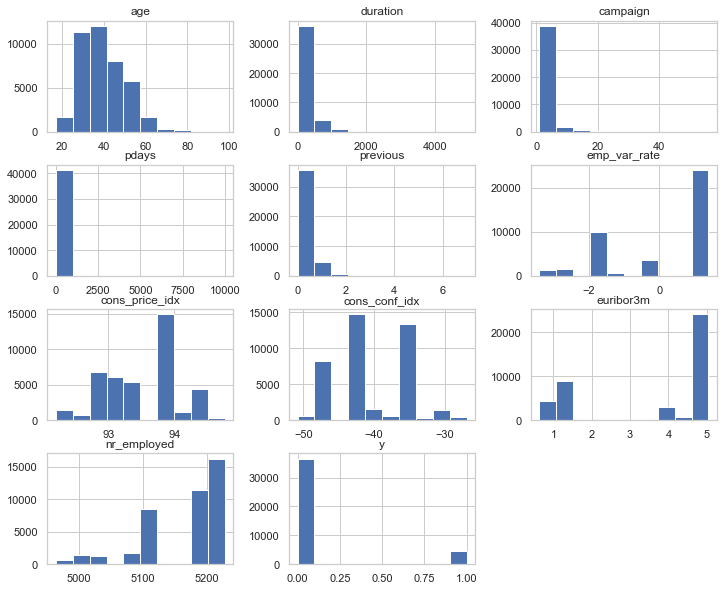

In [107]:
df1.hist(figsize=(12,10))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

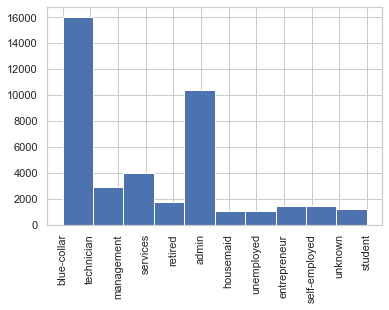

In [108]:
plt.hist(df1.job)
plt.xticks(rotation = 90)

In [109]:
purf=df1.loc[(df1.y==1)]

In [110]:
purf.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [111]:
purf.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

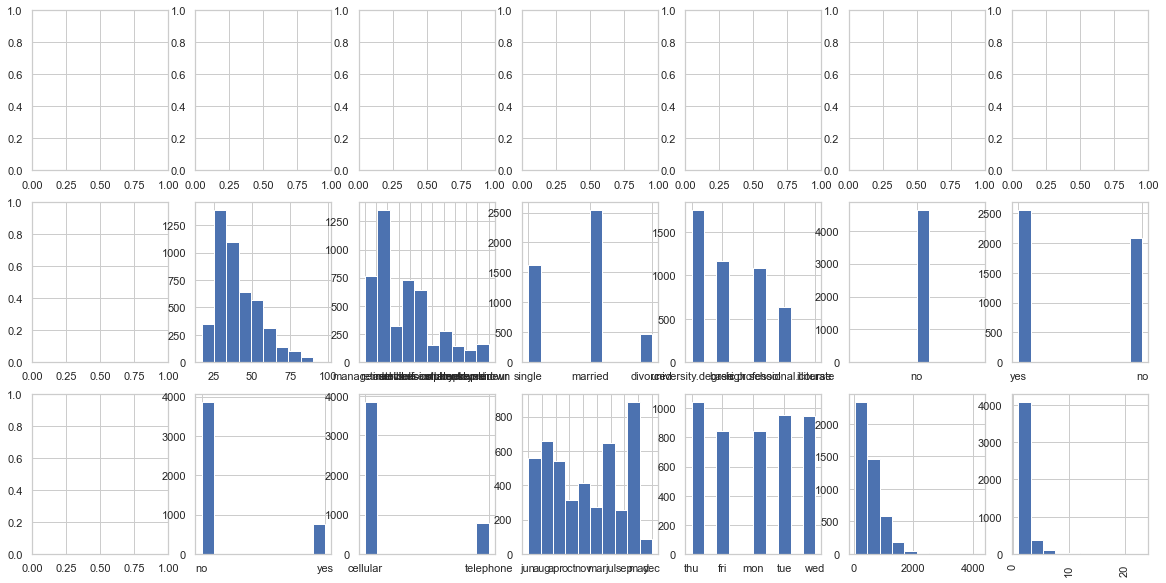

In [112]:
cols=purf.columns
n=0
#plt.figure(figsize=(20,20))
fig, axes = plt.subplots(nrows=3, ncols=7, figsize=(20,10))
plt.xticks(rotation=90)
for i in range (1,3):
  for j in range(1,7):
    #.subplot(i,j,n+1)
    axes[i,j].hist(purf[cols[n]])
    n+=1
plt.show()

(array([1620.,    0.,    0.,    0.,    0., 2544.,    0.,    0.,    0.,
         476.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

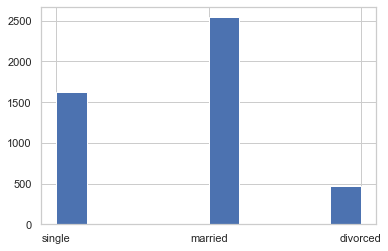

In [113]:
plt.hist(purf.marital)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

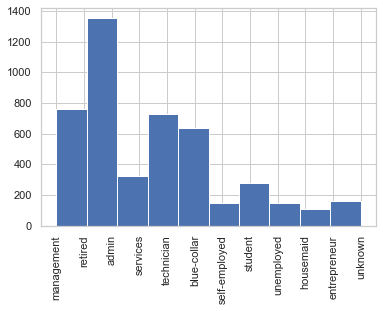

In [114]:
plt.hist(purf.job)
plt.xticks(rotation=90)

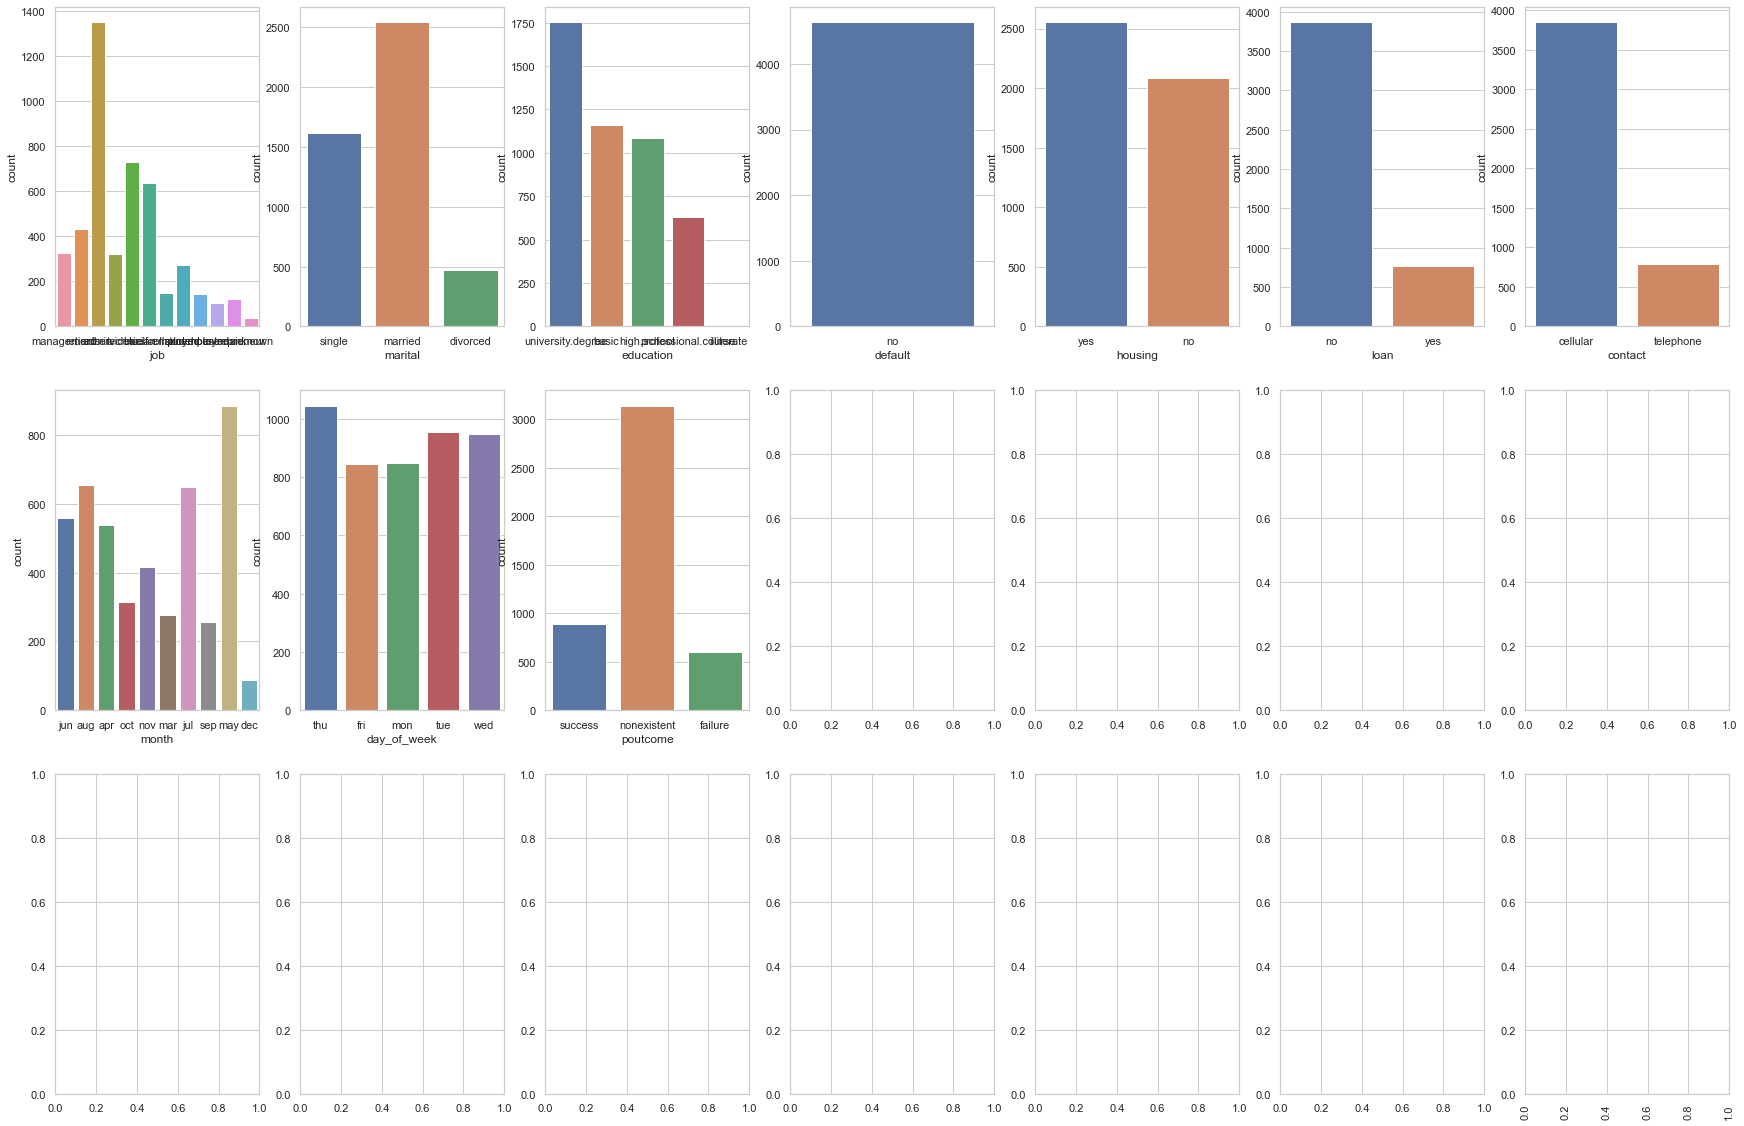

In [115]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
# create a list of all categorical variables
# initiate an empty list to store the categorical variables
categorical=[]

# use for loop to check the data type of each variable
for column in df1:

    # use 'if' statement with condition to check the categorical type 
    if is_string_dtype(df1[column]):
        
        # append the variables with 'categoric' data type in the list 'categorical'
        categorical.append(column)

# plot the count plot for each categorical variable 
# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(3, 7, figsize = (30,20))
plt.tick_params(axis='x', rotation=90)

# use for loop to plot the count plot for each variable
for variable, subplot in zip(categorical, ax.flatten()):
    
    # use countplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    #plt.xticks(rotation=90)
    sns.countplot(purf[variable], ax = subplot)
    

    
# display the plot

plt.show()

In [116]:
df_numeric_features =x.select_dtypes(include=np.number)
df_numeric_features.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2


In [117]:
x.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,blue-collar,married,basic,no,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
1,53,technician,married,basic,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
4,55,retired,married,basic,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2


In [118]:
df_categoric_features = df1.select_dtypes(include = object)
df_categoric_features.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [119]:
dummy_encoded_variables = pd.get_dummies(df_categoric_features, drop_first = True)

In [120]:
df2 = pd.concat([df_numeric_features, dummy_encoded_variables], axis=1)

In [121]:
df2.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_M,marital_S,marital_divorced,marital_married,marital_single,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_yes,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [122]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  float64
 4   previous                       41188 non-null  int64  
 5   emp_var_rate                   41188 non-null  float64
 6   cons_price_idx                 41188 non-null  float64
 7   cons_conf_idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr_employed                    41188 non-null  float64
 10  job_blue-collar                41188 non-null  uint8  
 11  job_entrepreneur               41188 non-null  uint8  
 12  job_housemaid                  41188 non-null 

In [123]:
x=df2

In [124]:
y.dtypes

dtype('int64')

In [127]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [128]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
x_train = scl.fit_transform(x_train)# train gets fitted and scaled
x_test = scl.transform(x_test)# test gets scaled only so data is in proportion

In [129]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [130]:
predictions = model.predict(x_test)
print(predictions)# printing predictions

print()# Printing new line

#Check precision, recall, f1-score
print( classification_report(y_test, predictions) )

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [131]:
print( "The accuracy of the Model",accuracy_score(y_test, predictions))

The accuracy of the Model 0.9112648701141054


In [132]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predictions, labels = [0, 1]))
print(metrics.classification_report(y_test, predictions, labels = [0,1]))

[[7112  205]
 [ 526  395]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7317
           1       0.66      0.43      0.52       921

    accuracy                           0.91      8238
   macro avg       0.79      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238



# SMOTE

In [133]:
y.value_counts(normalize=True) # imbalanced classes

0    0.887346
1    0.112654
Name: y, dtype: float64

In [134]:
#X = df2.loc[:, df2.columns != 'y']
#y = df2.loc[:, df2.columns == 'y']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
columns = x_train.columns
os_data_x,os_data_y=os.fit_sample(x_train, y_train)
os_data_x = pd.DataFrame(data=os_data_x,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_x))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_x))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_x))

length of oversampled data is  51134
Number of no subscription in oversampled data 25567
Number of subscription 25567
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [135]:
df2['y']=df1['y']

In [136]:
df2.y

0        0
1        0
2        1
3        0
4        1
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: y, Length: 41188, dtype: int64

In [137]:
data_final_vars=df2.columns.values.tolist()
y=['y']
x=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 40)
rfe = rfe.fit(os_data_x, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False  True False  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True False False  True
  True  True  True False  True  True False  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True]
[ 4  3  1  5  1  1  1  1  1  2  1  1  1  1  1  1  1  1  1  1  1  6  8  1
  1  1  1  7  1  1 10  1  1  1  1  1  1  1  1  1  1  9  1  1  1  1  1  1
  1]


In [138]:
df2.shape

(41188, 50)

In [139]:
cols=df2.columns

In [140]:
ncols=[]
for i in range(0,46):
  if rfe.support_[i]==True:
    ncols= ncols + [cols[i]]

In [141]:
print(ncols)

['campaign', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'education_high.school', 'education_professional.course', 'education_university.degree', 'housing_yes', 'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue']


In [142]:
len(ncols)

37

In [143]:
x=os_data_x[ncols]
y=os_data_y['y']

In [144]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.250057
         Iterations 12
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.639     
Dependent Variable:      y                    AIC:                  25646.8636
Date:                    2021-09-16 17:52     BIC:                  25974.0251
No. Observations:        51134                Log-Likelihood:       -12786.   
Df Model:                36                   LL-Null:              -35443.   
Df Residuals:            51097                LLR p-value:          0.0000    
Converged:               1.0000               Scale:                1.0000    
No. Iterations:          12.0000                                              
------------------------------------------------------------------------------
                               Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------

In [145]:
x=x.drop(['job_entrepreneur','day_of_week_mon'],axis=1)

In [146]:
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.261397
         Iterations 12
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.623     
Dependent Variable:      y                    AIC:                  26802.5614
Date:                    2021-09-16 17:52     BIC:                  27112.0386
No. Observations:        51134                Log-Likelihood:       -13366.   
Df Model:                34                   LL-Null:              -35443.   
Df Residuals:            51099                LLR p-value:          0.0000    
Converged:               1.0000               Scale:                1.0000    
No. Iterations:          12.0000                                              
------------------------------------------------------------------------------
                               Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
result=logreg.fit(x_train, y_train)

In [148]:
y_pred = logreg.predict(x_test)
print('Accuracy of a regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of a regression classifier on test set: 0.90


In [149]:
print( "The accuracy of the Model",accuracy_score(y_test, y_pred))

The accuracy of the Model 0.8973991265236947


In [150]:
print( classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7666
           1       0.92      0.87      0.89      7675

    accuracy                           0.90     15341
   macro avg       0.90      0.90      0.90     15341
weighted avg       0.90      0.90      0.90     15341



Accuracy = 0.90
Recall = 0.87



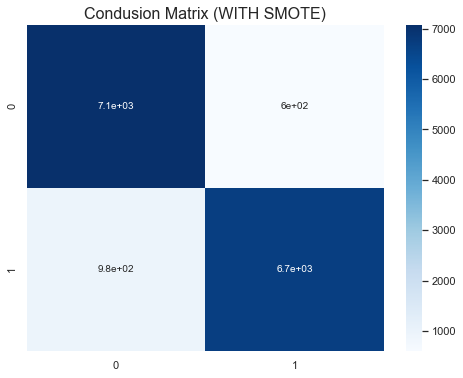

In [151]:
from sklearn.metrics import accuracy_score, recall_score , confusion_matrix
print(f'Accuracy = {accuracy_score(y_test, y_pred):.2f}\nRecall = {recall_score(y_test, y_pred):.2f}\n')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
plt.title('Condusion Matrix (WITH SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap= 'Blues');